In [3]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

Загружаем excel файл в Dataframe

In [4]:
data = pd.read_excel("D:\__Study__\CluseterTerm\StatLab\Vyborka_Novaya.xlsx")
data = data[1:123]
print(data['ИК'])

1      32.5
2      32.5
3      31.9
4      32.8
5      31.6
       ... 
118    34.7
119    34.5
120    33.8
121    33.7
122    33.8
Name: ИК, Length: 122, dtype: float64


Text(0.5, 1.0, 'Гистограмма данных')

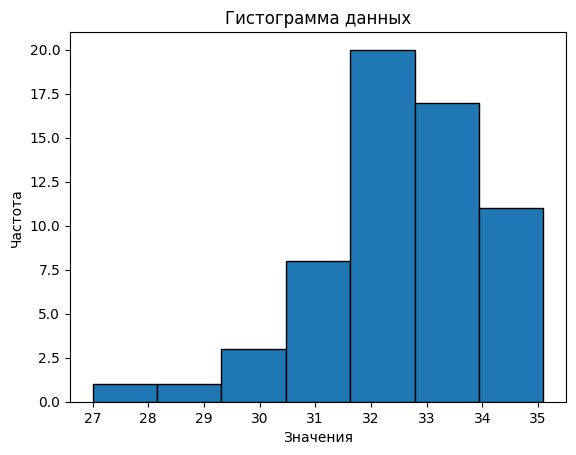

In [15]:
left_table = data[data['МЖ'] == 'левая']    
right_table = data[data['МЖ'] == 'правая']    
right_table_val = right_table['ИК']
left_table_val = left_table['ИК']
# Сбрасываем индексы
right_table_reset = right_table_val.reset_index(drop=True)
left_table_reset = left_table_val.reset_index(drop=True)

merged_table = pd.concat([right_table_reset, left_table_reset], axis=1)
merged_table.columns = ['Правая', 'Левая']
right_val = merged_table.iloc[:,0]
left_val = merged_table.iloc[:,1]
# Построение гистограммы
plt.hist(right_val, bins=7, edgecolor='k')  # "bins" - количество столбцов в гистограмме, "edgecolor" - цвет границ столбцов
plt.xlabel('Значения')  # Название оси x
plt.ylabel('Частота')  # Название оси y
plt.title('Гистограмма данных')  # Заголовок графика

In [ ]:
# Замените n на количество наблюдений в вашей таблице
n = len(merged_table.iloc[:,0])

# Рассчитываем количество интервалов с использованием формулы Стерджерса
k = 1 + 3.322 * math.log10(n)

# Округляем значение k до ближайшего целого числа
k = round(k)
# Выводим количество интервалов
print("Число интервалов (групп) по формуле Стерджерса:", k)

# Находим максимальное и минимальное значение в данных у правого
max_value_r = max(right_val)
min_value_r = min(right_val)
print('Правый:', min_value_r, max_value_r)
# Находим максимальное и минимальное значение в данных у левого
max_value_l = max(left_val)
min_value_l = min(left_val)
print('Левый:', min_value_l, max_value_l)
# Рассчитываем шаг разбиения (длину интервала) у левого
h_l = (max_value_l - min_value_l) / k
# Рассчитываем шаг разбиения (длину интервала) у правого
h_r = (max_value_r - min_value_r) / k

half_h_r = h_r / 2
half_h_l = h_l / 2
# Выводим шаг разбиения и полшага
print("Шаг разбиения (длина интервала):", h_l, h_r)
print("Половина шага разбиения:", half_h_l, half_h_r)

In [ ]:
# Создаем список для хранения границ интервалов
interval_boundaries_l = [min_value_l]
interval_boundaries_r = [min_value_r]
# Добавляем остальные границы интервалов
for i in range(k):
    interval_boundaries_l.append(interval_boundaries_l[-1] + h_l)
    interval_boundaries_r.append(interval_boundaries_r[-1] + h_l)

# Границы интервалов
print("Границы интервалов левого:", interval_boundaries_l)
print("Границы интервалов правого:", interval_boundaries_r)


In [ ]:
# Создаем словарь для хранения данных в интервалах
interval_data_l = {interval: [] for interval in range(k)}
interval_data_r = {interval: [] for interval in range(k)}
# Распределяем данные по интервалам
for value in left_val:
    for i in range(len(interval_boundaries_l) - 1):
        if interval_boundaries_l[i] <= value < interval_boundaries_l[i+1]:
            interval_data_l[i].append(value)
            break
for value in right_val:
    for i in range(len(interval_boundaries_r) - 1):
        if interval_boundaries_r[i] <= value < interval_boundaries_r[i+1]:
            interval_data_r[i].append(value)
            break
print(interval_data_l)
print(interval_data_r)

In [ ]:
# Создаем списки для построения гистограммы и полигона
hist_values_l = []
polygon_values_l = []
hist_values_r = []
polygon_values_r = []

for interval in range(k):
    interval_values_l = interval_data_l[interval]
    interval_values_r = interval_data_r[interval]
    hist_values_l.append(len(interval_values_l))
    polygon_values_l.extend(interval_values_l)
    hist_values_r.append(len(interval_values_r))
    polygon_values_r.extend(interval_values_r)


In [ ]:
#2 ЛАБА. Поиск средних.

# несгруп. данные
print(merged_table)
# сгруп. данные
print(interval_data_l)

In [ ]:
# Выборочная средняя
mean_r = np.mean(right_val)
mean_l = np.mean(left_val)
# Выборочная дисперсия
variance_r = np.var(right_val)
variance_l = np.var(left_val)
# Исправленная выборочная дисперсия
sample_variance_r = np.var(right_val, ddof=1)
sample_variance_l = np.var(left_val, ddof=1)
# Мода
mode_r = stats.mode(right_val)
mode_l = stats.mode(left_val)
# Медиана
median_r = np.median(right_val)
median_l = np.median(left_val)

# Вывод результатов
print("Выборочная средняя правого и левого:", mean_r, mean_l)
print("Выборочная дисперсия правого и левого:", variance_r, variance_l)
print("Исправленная выборочная дисперсия правого и левого:", sample_variance_r, variance_l)
print("Мода правого и левого:", mode_r, mode_l)
print("Медиана правого и левого:", median_r, median_l)